In [23]:
import numpy as np
import pandas as pd
import ast
from sentence_transformers import util
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [24]:
human = pd.read_csv('human_artificial_minilm_openai_embeddings_symmetry.csv')


In [25]:
human

,x,y,z,score,incomprehensibleMarkings,offensiveMarkings,average_score,emb_minilm_x,emb_minilm_y,emb_minilm_z,...,minilm_x-y,minilm_comparison,minilm_obviousness,minilm_compatibility,diff_openai_xz-z_yz-z,openai_symmetry,openai_x-y,openai_comparison,openai_obviousness,openai_compatibility
0,men,McDonalds,cheap with a toy on the side,"[1,2,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,5]",0,1,3.368421,"[-0.04805279150605202, 0.0446431003510952, -0....","[-0.03200775384902954, -0.06043137609958649, 0...","[-0.033495958894491196, 0.05692833289504051, 0...",...,0.298805,0.611392,0.082095,0.178571,0.091851,0.090680,0.194741,0.685940,0.152396,0.243075
1,women,coffee,"black, bitter and preferably fair trade","[1,2,2,3,3,3,3,3,4,4,4,4,4,5,5]",0,1,3.333333,"[0.007278132252395153, -0.020804431289434433, ...","[-0.03095192275941372, 0.018730182200670242, 0...","[-0.0547354631125927, -0.021777495741844177, -...",...,0.285485,0.657213,0.155800,0.263621,0.000820,0.174542,0.298331,0.730552,0.213098,0.387640
2,home,evenings,filled with loneliness and depressing memories,"[1,1,1,1,1,1,2,2,2,3,3,4,4,4,4]",0,1,2.266667,"[0.040955815464258194, 0.019688254222273827, -...","[0.029451437294483185, 0.0035307053476572037, ...","[-0.00421473802998662, -0.010743106715381145, ...",...,0.383437,0.809421,0.239771,0.260619,0.065450,0.038548,0.327584,0.744711,0.224293,0.262842
3,women,dendrites,ready to receive my transmission,"[1,1,1,1,1,1,1,1,2,2,4,4,4,4,5,5,5,5,5,5]",1,0,2.900000,"[0.007278132252395153, -0.020804431289434433, ...","[-0.015804383903741837, -0.06684033572673798, ...","[-0.045801229774951935, 0.004314403515309095, ...",...,0.211909,0.565945,0.099090,0.048441,0.063287,0.000798,0.151997,0.600607,0.193376,0.192578
4,boyfriends,adventure movies,a little rough with a happy ending,"[1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,5,5]",0,0,3.416667,"[-0.04999513551592827, 0.014507962390780449, 0...","[-0.02072649821639061, 0.01930876262485981, -0...","[-0.01790904439985752, 0.01793697476387024, 0....",...,0.194879,0.576621,0.099360,0.303473,0.092311,0.029045,0.177640,0.603342,0.266726,0.237681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,boobs,government,big,"[1,2,2,2,2,2,2,2,3,3,3,5]",0,1,2.416667,"[0.013195332139730453, 0.0026167789474129677, ...","[-0.06136007606983185, 0.042866308242082596, 0...","[0.02561303973197937, 0.053659114986658096, -0...",...,0.371278,0.463316,0.351782,0.316956,0.188377,0.091662,0.222816,0.268863,0.427593,0.335931
517,relationships,reality tv shows,hugely entertaining but too embarrassing to ta...,"[1,1,1,2,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,4,4,5,5]",0,0,3.000000,"[-0.044962115585803986, 0.05694946274161339, -...","[-0.049706775695085526, -0.08171508461236954, ...","[-0.018775230273604393, -0.0027690064162015915...",...,0.170234,0.584878,0.090019,0.220943,0.120865,0.086199,0.251562,0.746720,0.169903,0.256101
518,people,back,hurt,"[1,1,1,1,1,1,2,2,2,3,3,3,4,4,4]",0,1,2.200000,"[-0.03228759765625, 0.02854936756193638, -0.02...","[-0.02990780957043171, -0.016124438494443893, ...","[-0.0393325537443161, 0.0007160977693274617, 0...",...,0.298473,0.507613,0.291882,0.439503,0.213428,0.013230,0.311768,0.520006,0.298270,0.285039
519,women,tool kits,useful for screwing or hitting,"[1,1,1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,4,4,4,5]",1,0,2.739130,"[0.007278132252395153, -0.020804431289434433, ...","[-0.0945926234126091, 0.02964070998132229, -0....","[-0.04071880131959915, 0.08163653314113617, 0....",...,0.152875,0.420806,0.083086,0.334897,0.036788,0.161977,0.192333,0.602171,0.182024,0.344001


### The number of ratings for each joke

In [26]:
lengths = human['score'].apply(ast.literal_eval).apply(len)

# Find minimum and maximum lengths
min_length = lengths.min()
max_length = lengths.max()

print("Shortest vector length:", min_length)
print("Longest vector length:", max_length)

Shortest vector length: 4
Longest vector length: 57


### Round the average score

In [27]:
import ast
from statistics import mode

human['average_score_approx'] = human['average_score'].round().astype(int)


### The number of jokes for each class

In [28]:
# Check the distribution of classes in y_train
class_counts = human['average_score_approx'].value_counts()
print(class_counts)

average_score_approx
3    263
2    217
4     30
1     11
Name: count, dtype: int64


In [29]:
lengths = human['score'].apply(ast.literal_eval).apply(len)

# Find minimum and maximum lengths
min_length = lengths.min()
max_length = lengths.max()

print("Shortest vector length:", min_length)
print("Longest vector length:", max_length)

Shortest vector length: 4
Longest vector length: 57


### Round the average score

In [30]:
import ast
from statistics import mode

human['average_score_approx'] = human['average_score'].round().astype(int)


### The number of jokes for each class

In [31]:
# Check the distribution of classes in y_train
class_counts = human['average_score_approx'].value_counts()
print(class_counts)

average_score_approx
3    263
2    217
4     30
1     11
Name: count, dtype: int64


### Compress the score classification to three levels: 

In [32]:
human['score_3levels'] = human['average_score_approx'].map({
    1: 1,
    2: 1,
    3: 2,
    4: 3,
    5: 3
})


In [33]:
# Check the distribution of classes in y_train
class_counts = human['score_3levels'].value_counts()
print(class_counts)

score_3levels
2    263
1    228
3     30
Name: count, dtype: int64


### check the dataset

In [34]:
for i in range(1):
    x = human.x[i]
    y = human.y[i]
    z = human.z[i]
    xz = human.x[i] + " " + human.z[i]
    yz = human.y[i] + " " + human.z[i]
    xyz = "I like my " + human.x[i] + " like I like my " + human.y[i] + ", " + human.z[i]

    print ("x:", x)
    print ("y:", y)
    print ("z:", z)
    print ("xz:", xz)
    print ("yz:", yz)
    print ("xyz:", xyz)

x: men
y: McDonalds
z: cheap with a toy on the side
xz: men cheap with a toy on the side
yz: McDonalds cheap with a toy on the side
xyz: I like my men like I like my McDonalds, cheap with a toy on the side


In [35]:
'''
COLUMN NUMBERS:
x - 0
y - 1
z - 2
score - 3
incomprehensibleMarkings - 4
offensiveMarkings - 5
average_score  - 6
emb_openai_x   - 7
emb_openai_y   - 8	
emb_openai_z   - 9
emb_openai_xz  - 10
emb_openai_yz  - 11	
emb_openai_xyz - 12
'''



'\nCOLUMN NUMBERS:\nx - 0\ny - 1\nz - 2\nscore - 3\nincomprehensibleMarkings - 4\noffensiveMarkings - 5\naverage_score  - 6\nemb_openai_x   - 7\nemb_openai_y   - 8\t\nemb_openai_z   - 9\nemb_openai_xz  - 10\nemb_openai_yz  - 11\t\nemb_openai_xyz - 12\n'

In [36]:
def metrics (y_true, y_predicted):
    accuracy = accuracy_score(y_true, y_predicted)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_true, y_predicted, average='weighted')
    print("Précision: ", precision)
    recall = recall_score(y_true, y_predicted, average='weighted')
    print("Recall: ", recall)
    f1 = f1_score(y_true, y_predicted, average='weighted')
    print("F1-score: ", f1)
    conf_mat = confusion_matrix(y_true, y_predicted, normalize='all')
    print("Confusion matrix :\n", conf_mat)


# =========================
# <U>MINILM
# =========================

### Prepare the data

In [37]:
subset_df = human[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'average_score_approx']].copy()

data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']] #0.615 0.628
#data = subset_df[['diff_minilm_xz-z_yz-z', 'diff_minilm_x-z_y-z', 'minilm_x-y', 'minilm_xz-yz', 'minilm_x-z']] # 0.679 0.524
#data = subset_df[['diff_minilm_xz-z_yz-z', 'diff_minilm_x-z_y-z', 'minilm_x-y', 'minilm_xz-yz']] # 0.632 0.467
#data = subset_df[['diff_minilm_xz-z_yz-z', 'diff_minilm_x-z_y-z', 'minilm_x-y']] # 0.625 0.457
#data = subset_df[['minilm_x-y', 'minilm_xz-yz', 'minilm_x-z', 'minilm_y-z']] # 0.632 0.590

target = subset_df['average_score_approx']
#target = subset_df['most_frequent_score']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


In [38]:

# Check the distribution of classes in y_train
class_counts = y_train.value_counts()
print(class_counts)

average_score_approx
3    211
2    173
4     22
1     10
Name: count, dtype: int64


In [39]:

# Check the distribution of classes in y_train
class_counts = y_test.value_counts()
print(class_counts)

average_score_approx
3    52
2    44
4     8
1     1
Name: count, dtype: int64


### Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)



Accuracy:  0.5504807692307693
Précision:  0.5337200227393493
Recall:  0.5504807692307693
F1-score:  0.5042687246963562
Confusion matrix :
 [[0.         0.00240385 0.02163462 0.        ]
 [0.         0.12740385 0.28605769 0.00240385]
 [0.         0.08413462 0.42067308 0.00240385]
 [0.         0.00721154 0.04326923 0.00240385]]

Accuracy:  0.5333333333333333
Précision:  0.48672647803082586
Recall:  0.5333333333333333
F1-score:  0.5019205037386856
Confusion matrix :
 [[0.         0.         0.00952381 0.        ]
 [0.         0.18095238 0.23809524 0.        ]
 [0.         0.14285714 0.35238095 0.        ]
 [0.         0.01904762 0.05714286 0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SVM

In [41]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf = SVC(kernel='linear', C=1.0, gamma='scale')  # You can change kernel to 'rbf', 'linear', 'poly', or 'sigmoid'
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)




Accuracy:  0.5336538461538461
Précision:  0.5426755347415969
Recall:  0.5336538461538461
F1-score:  0.42518254719346377
Confusion matrix :
 [[0.         0.         0.02403846 0.        ]
 [0.         0.04807692 0.36778846 0.        ]
 [0.         0.02163462 0.48557692 0.        ]
 [0.         0.00240385 0.05048077 0.        ]]

Accuracy:  0.4857142857142857
Précision:  0.4126315789473684
Recall:  0.4857142857142857
F1-score:  0.37876399236943453
Confusion matrix :
 [[0.         0.         0.00952381 0.        ]
 [0.         0.03809524 0.38095238 0.        ]
 [0.         0.04761905 0.44761905 0.        ]
 [0.         0.00952381 0.06666667 0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# search best random forest

Best parameters: {'max_depth': 13, 'min_samples_split': 70, 'n_estimators': 5}
Best cross-validated accuracy: 0.564916810097533


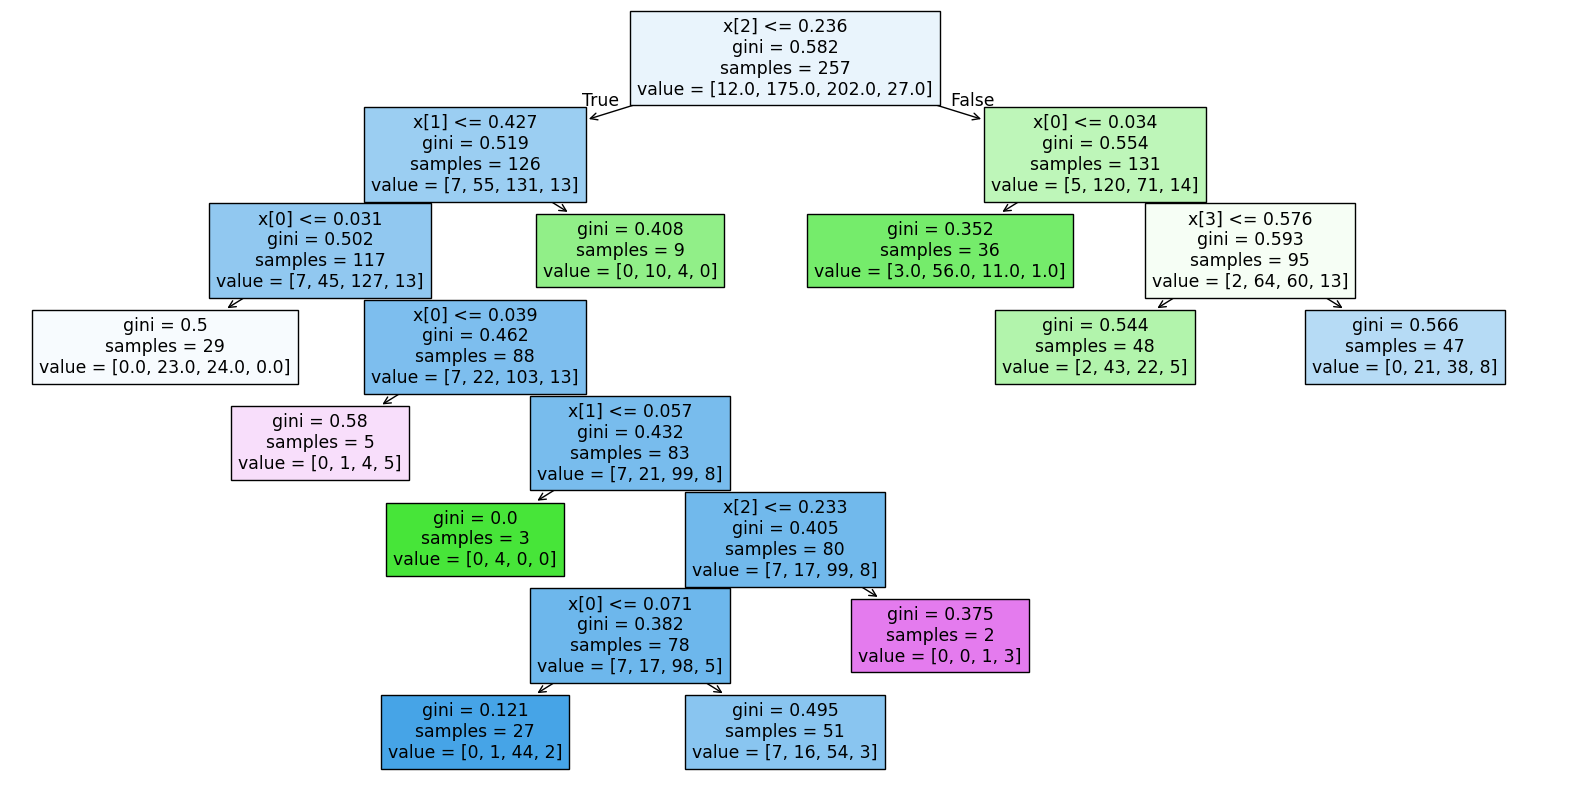

Accuracy:  0.6153846153846154
Précision:  0.5674364820132846
Recall:  0.6153846153846154
F1-score:  0.5898174831892411
Confusion matrix :
 [[0.         0.01201923 0.01201923 0.        ]
 [0.         0.25240385 0.16346154 0.        ]
 [0.         0.14423077 0.36298077 0.        ]
 [0.         0.00961538 0.04326923 0.        ]]

Accuracy:  0.5238095238095238
Précision:  0.48050314465408805
Recall:  0.5238095238095238
F1-score:  0.5005442176870748
Confusion matrix :
 [[0.         0.         0.00952381 0.        ]
 [0.         0.24761905 0.17142857 0.        ]
 [0.         0.21904762 0.27619048 0.        ]
 [0.         0.02857143 0.04761905 0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

Best parameters: {'max_depth': 7, 'min_samples_split': 12, 'n_estimators': 5}
Best cross-validated accuracy: 0.5698221457257602


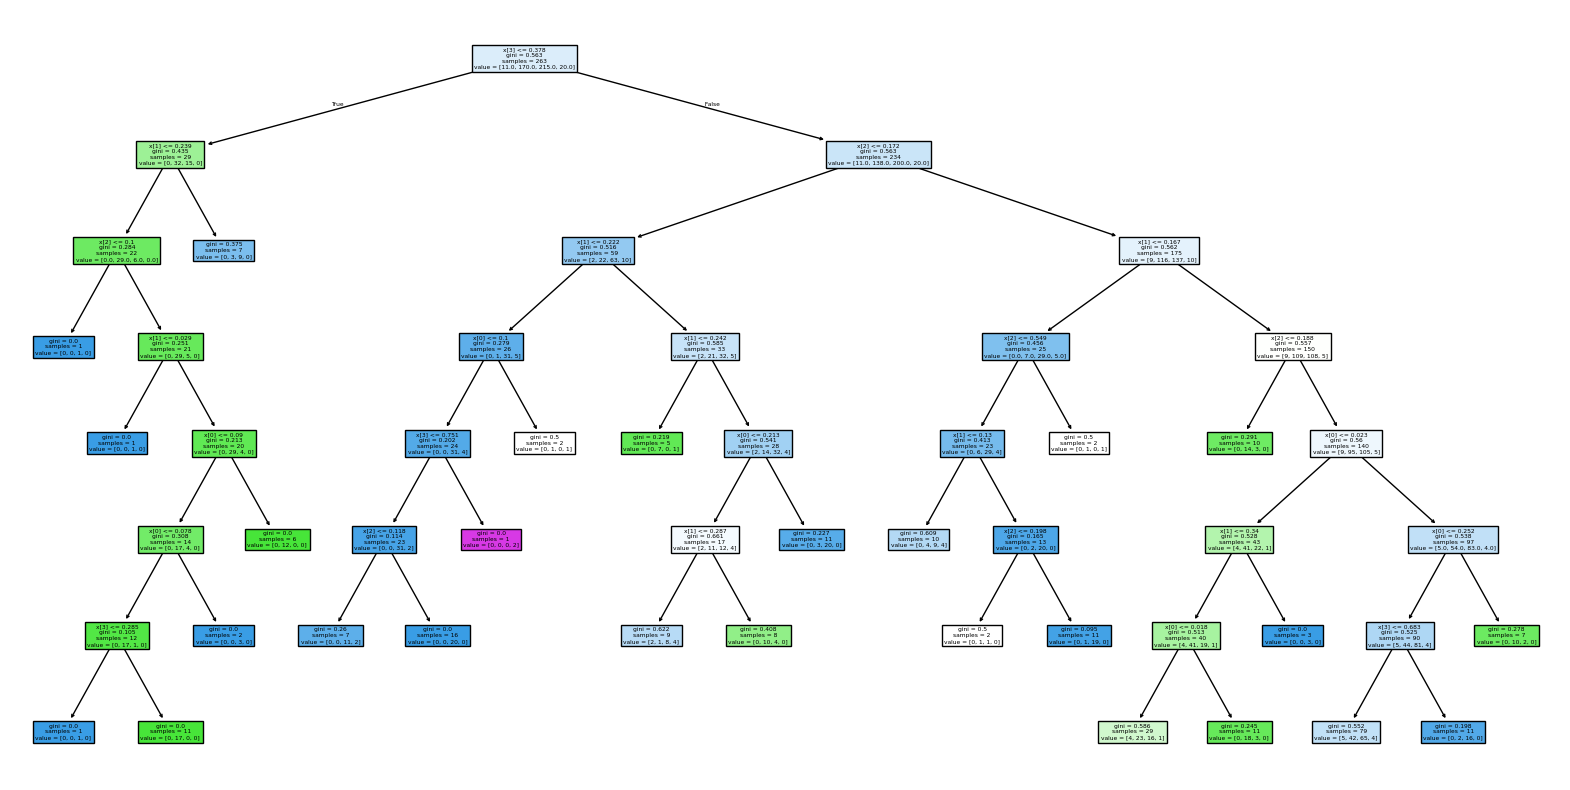

Accuracy:  0.7259615384615384
Précision:  0.6996830484330483
Recall:  0.7259615384615384
F1-score:  0.7021566061668195
Confusion matrix :
 [[0.         0.01201923 0.01201923 0.        ]
 [0.         0.28846154 0.12740385 0.        ]
 [0.         0.06971154 0.43269231 0.00480769]
 [0.         0.01923077 0.02884615 0.00480769]]

Accuracy:  0.5238095238095238
Précision:  0.47743950039032007
Recall:  0.5238095238095238
F1-score:  0.4987779182469448
Confusion matrix :
 [[0.         0.         0.00952381 0.        ]
 [0.         0.20952381 0.20952381 0.        ]
 [0.         0.18095238 0.31428571 0.        ]
 [0.         0.02857143 0.04761905 0.        ]]


/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/humour/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# WEKA

In [45]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Compute RRSE
numerator = np.sum((y_test - y_pred) ** 2)
denominator = np.sum((y_test - np.mean(y_test)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


RRSE: 1.1082
MSE: 0.4941
R²: -0.2280


In [46]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Train Random Forest
model = RandomForestRegressor(max_depth=5, n_estimators=20, random_state=42)
model.fit(x_train, y_train)

# TRAIN METRICS
print("TRAIN")
# Predict on train set
y_pred = model.predict(x_train)

# Compute RRSE
numerator = np.sum((y_train - y_pred) ** 2)
denominator = np.sum((y_train - np.mean(y_train)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


# TEST METRICS
print()
print("TEST")
# Predict on test set
y_pred = model.predict(x_test)

# Compute RRSE
numerator = np.sum((y_test - y_pred) ** 2)
denominator = np.sum((y_test - np.mean(y_test)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


TRAIN
RRSE: 0.7871
MSE: 0.2453
R²: 0.3804

TEST
RRSE: 1.0565
MSE: 0.4491
R²: -0.1162


# Regression

In [47]:
subset_df = human[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison', 'average_score']].copy()
data = subset_df[['minilm_symmetry', 'minilm_compatibility', 'minilm_obviousness', 'minilm_comparison']] #0.615 0.628
target = subset_df['average_score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [ 0.41954171 -0.90892388 -0.91659565  0.61110976]
Intercept: 2.6470248662016185
Mean squared error: 0.3460700326064994
R² score: -0.021085979274855893


# =================================================
# <U>     OPENAI
# =================================================

### Prepare the data

In [ ]:
subset_df = human[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'average_score_approx']].copy()

data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']] #0.615 0.628
#data = subset_df[['diff_openai_xz-z_yz-z', 'diff_openai_x-z_y-z', 'openai_x-y', 'openai_xz-yz', 'openai_x-z']] # 0.679 0.524
#data = subset_df[['diff_openai_xz-z_yz-z', 'diff_openai_x-z_y-z', 'openai_x-y', 'openai_xz-yz']] # 0.632 0.467
#data = subset_df[['diff_openai_xz-z_yz-z', 'diff_openai_x-z_y-z', 'openai_x-y']] # 0.625 0.457
#data = subset_df[['openai_x-y', 'openai_xz-yz', 'openai_x-z', 'openai_y-z']] # 0.632 0.590

target = subset_df['average_score_approx']
#target = subset_df['most_frequent_score']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


### naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)


### svm

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf = SVC(kernel='linear', C=1.0, gamma='scale')  # You can change kernel to 'rbf', 'linear', 'poly', or 'sigmoid'
clf.fit(x_train, y_train)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)




# Decision tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
plot_tree(clf)
plt.show()

y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Create and train the random forest (depth determined automatically)
clf = RandomForestClassifier(max_depth=4, random_state=60)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()


y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)


# search best random forest

In [ ]:
# Define the classifier
clf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [5, 10, 20, 30, 40, 50, 100, 200, 300],           # number of trees
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],          # None means full depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],      # minimum samples to split a node
}

# Setup grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Use the optimized model
clf = grid_search.best_estimator_






# Create and train the random forest (depth determined automatically)
#clf = RandomForestClassifier(max_depth=5)  # n_estimators is number of trees
clf.fit(x_train, y_train)

# Plot one of the trees in the forest for visualization
plt.figure(figsize=(20,10))
plot_tree(clf.estimators_[0], filled=True)  # Plot the first tree in the ensemble
plt.show()



y_pred_train = clf.predict(x_train)
metrics(y_train, y_pred_train)
print()
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

# WEKA

In [ ]:
# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Compute RRSE
numerator = np.sum((y_test - y_pred) ** 2)
denominator = np.sum((y_test - np.mean(y_test)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Train Random Forest
model = RandomForestRegressor(max_depth=5, n_estimators=20, random_state=42)
model.fit(x_train, y_train)

# TRAIN METRICS
print("TRAIN")
# Predict on train set
y_pred = model.predict(x_train)

# Compute RRSE
numerator = np.sum((y_train - y_pred) ** 2)
denominator = np.sum((y_train - np.mean(y_train)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


# TEST METRICS
print()
print("TEST")
# Predict on test set
y_pred = model.predict(x_test)

# Compute RRSE
numerator = np.sum((y_test - y_pred) ** 2)
denominator = np.sum((y_test - np.mean(y_test)) ** 2)
rrse = np.sqrt(numerator / denominator)

# Compute MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RRSE: {rrse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


# Regression

In [48]:
subset_df = human[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison', 'average_score']].copy()
data = subset_df[['openai_symmetry', 'openai_compatibility', 'openai_obviousness', 'openai_comparison']] #0.615 0.628
target = subset_df['average_score']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=40)


# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))


Coefficients: [ 0.82899018 -1.25162856 -1.03572791  0.57716114]
Intercept: 2.7636704489272446
Mean squared error: 0.3520604286769368
R² score: -0.03876075276436497
